# Part 1: Data Cleaning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import warnings 
warnings.filterwarnings('ignore')

In [2]:
path = '/Users/manish/Documents/Projects/data_science/MLR_practice/data/raw data/Housing.csv'

In [3]:
house = pd.read_csv(path)

In [4]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
house.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [6]:
house.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


    1. The data has 545 houses.
    2. There are no missing values in any of the columns.
    3. Num cols are : 'price', 'area'
    4. Num columns that are discrete: 'bedrooms', 'bathrooms', 'stories', 'parking'.
    5. Categorical columns are 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
    'prefarea', 'furnishingstatus'
    6. Target variable is 'price'.
    7. We have to predict the house price using rest of the features.

In [7]:
cat_col = ['mainroad', 'guestroom', 'basement', 
           'hotwaterheating', 'airconditioning',
           'prefarea', 'furnishingstatus']

num_cols = ['area', 'price']

num_dis_col = ['bedrooms', 'bathrooms', 'stories', 'parking']

In [8]:
for col in cat_col:
    print(house[col].value_counts(dropna = False))
    print('--'*10)

yes    468
no      77
Name: mainroad, dtype: int64
--------------------
no     448
yes     97
Name: guestroom, dtype: int64
--------------------
no     354
yes    191
Name: basement, dtype: int64
--------------------
no     520
yes     25
Name: hotwaterheating, dtype: int64
--------------------
no     373
yes    172
Name: airconditioning, dtype: int64
--------------------
no     417
yes    128
Name: prefarea, dtype: int64
--------------------
semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64
--------------------


In [9]:
for col in num_dis_col:
    print(house[col].value_counts(dropna = False))
    print('--'*10)    

3    300
2    136
4     95
5     10
6      2
1      2
Name: bedrooms, dtype: int64
--------------------
1    401
2    133
3     10
4      1
Name: bathrooms, dtype: int64
--------------------
2    238
1    227
4     41
3     39
Name: stories, dtype: int64
--------------------
0    299
1    126
2    108
3     12
Name: parking, dtype: int64
--------------------


In [10]:
for cols in num_cols:
    print(house[cols].describe())
    print('--'*15)

count      545.000000
mean      5150.541284
std       2170.141023
min       1650.000000
25%       3600.000000
50%       4600.000000
75%       6360.000000
max      16200.000000
Name: area, dtype: float64
------------------------------
count    5.450000e+02
mean     4.766729e+06
std      1.870440e+06
min      1.750000e+06
25%      3.430000e+06
50%      4.340000e+06
75%      5.740000e+06
max      1.330000e+07
Name: price, dtype: float64
------------------------------


    The data does not have any missing values
    But we need to convert the cat cols to numbers representing categories
    This can be done by one hot encoding.
    But before that lets do some EDA

# Part 2: EDA

In [11]:
def get_bars(data, cols):
    
    for i in cols:
        sns.catplot(kind = 'count',
                   palette = 'Spectral',
                   x = i,
                   data = data)
#         plt.savefig(f'Count plot for {i}', dpi = 500)

In [12]:
def get_dist(data, cols):
        
    for i in cols:
        plt.figure(figsize = (10, 5))
        plt.subplot(1, 2, 2)
        sns.boxenplot(color = 'C0',
                   x = i,
                   data = data)
        
        plt.subplot(1, 2, 1)
        sns.kdeplot(data = data,
                   x = i, color = 'C3')
        
#         plt.savefig(f'Dist plot for {i}', dpi = 500)
        plt.show()

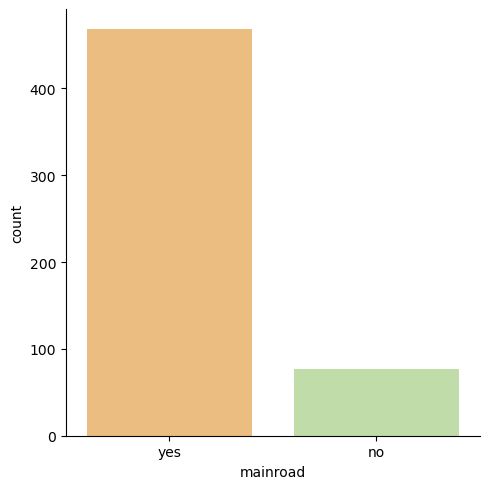

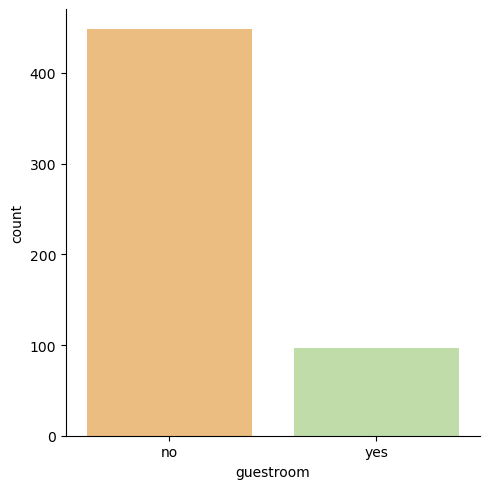

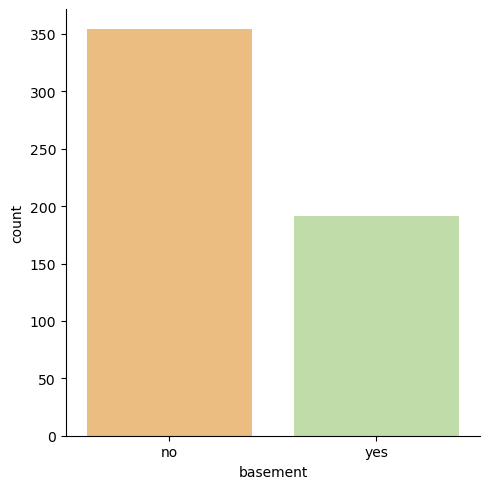

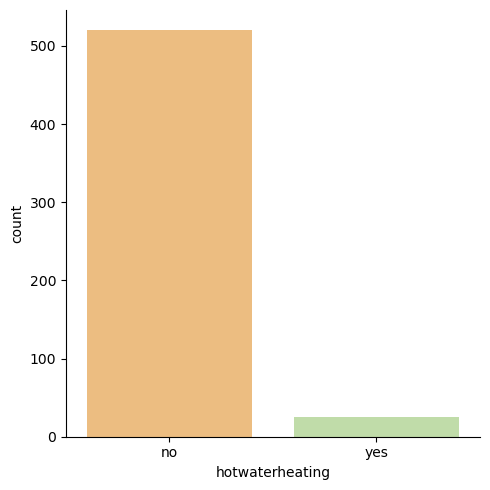

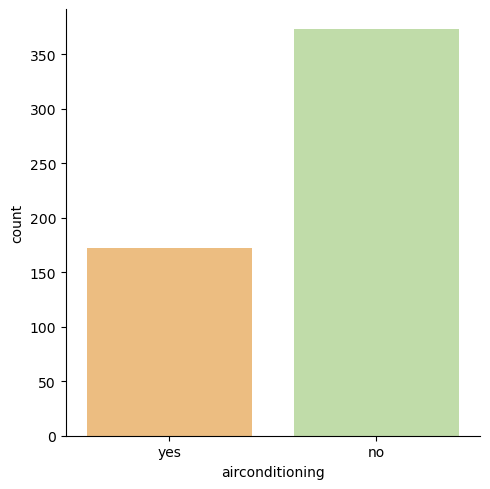

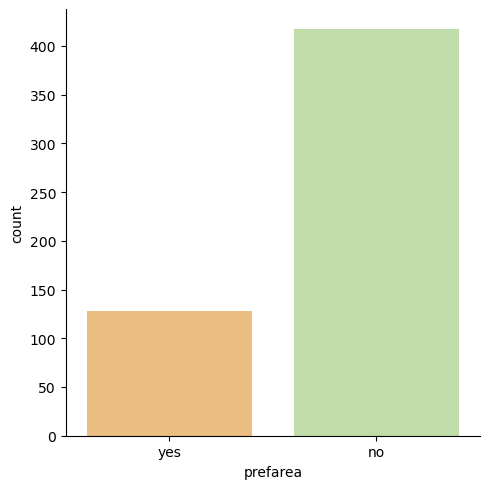

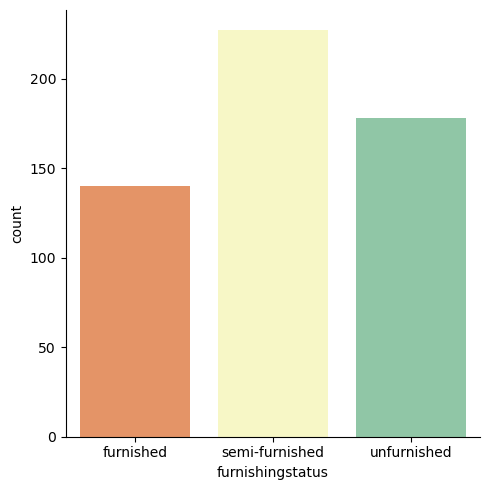

In [13]:
#categorical cols
get_bars(house, cat_col)

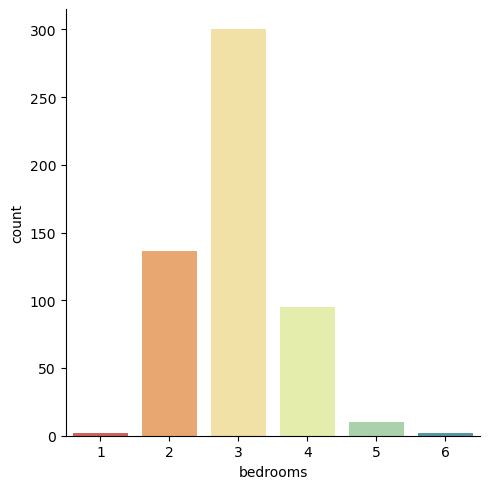

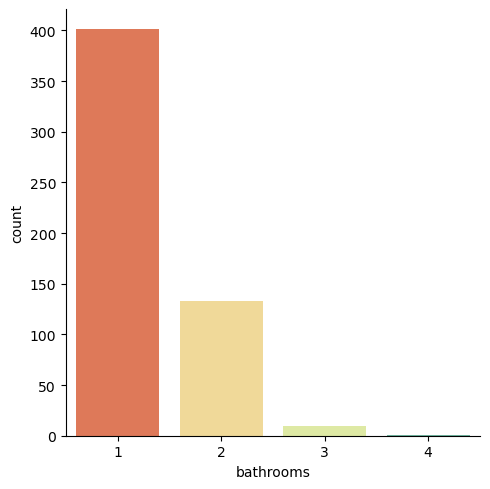

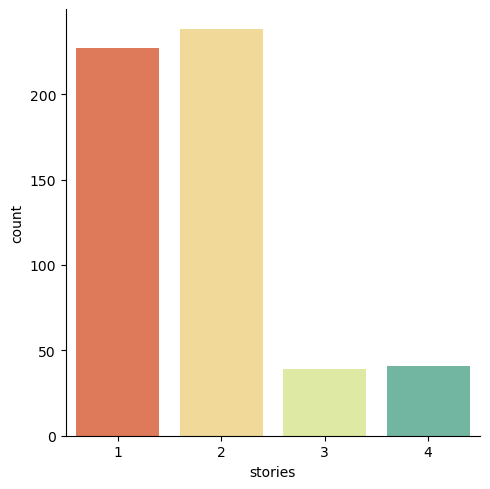

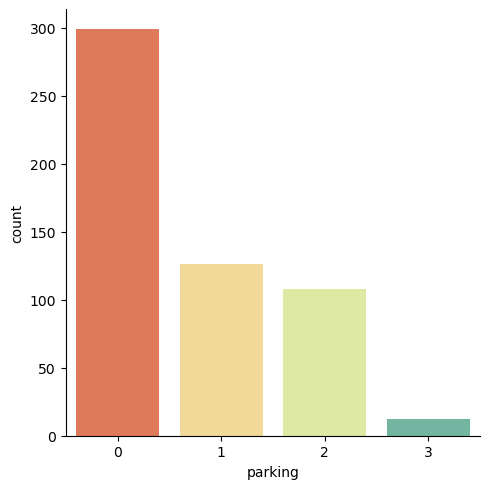

In [14]:
#num_cat_cols
get_bars(house, num_dis_col)

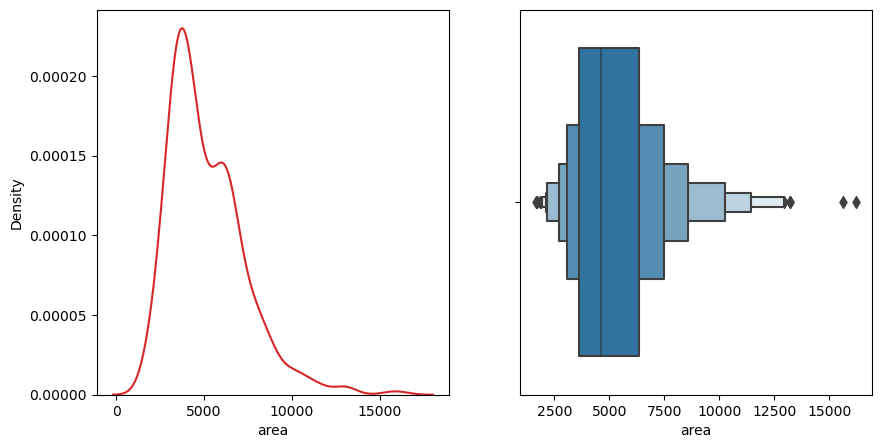

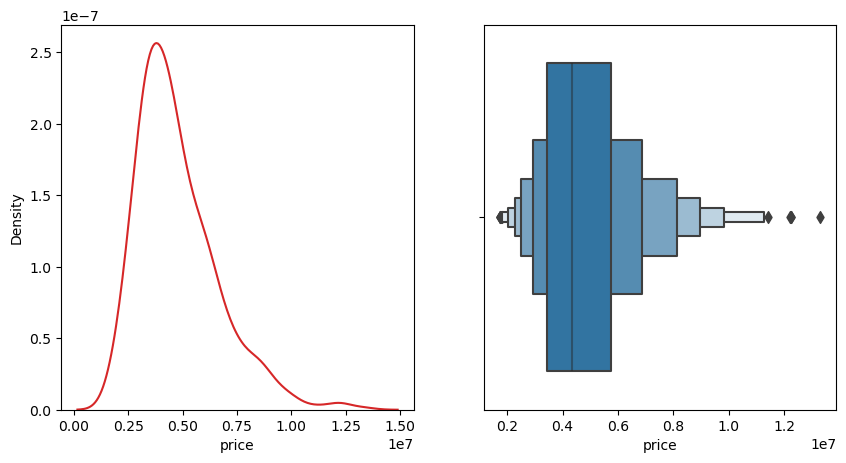

In [15]:
#numerical cols
get_dist(house, num_cols)

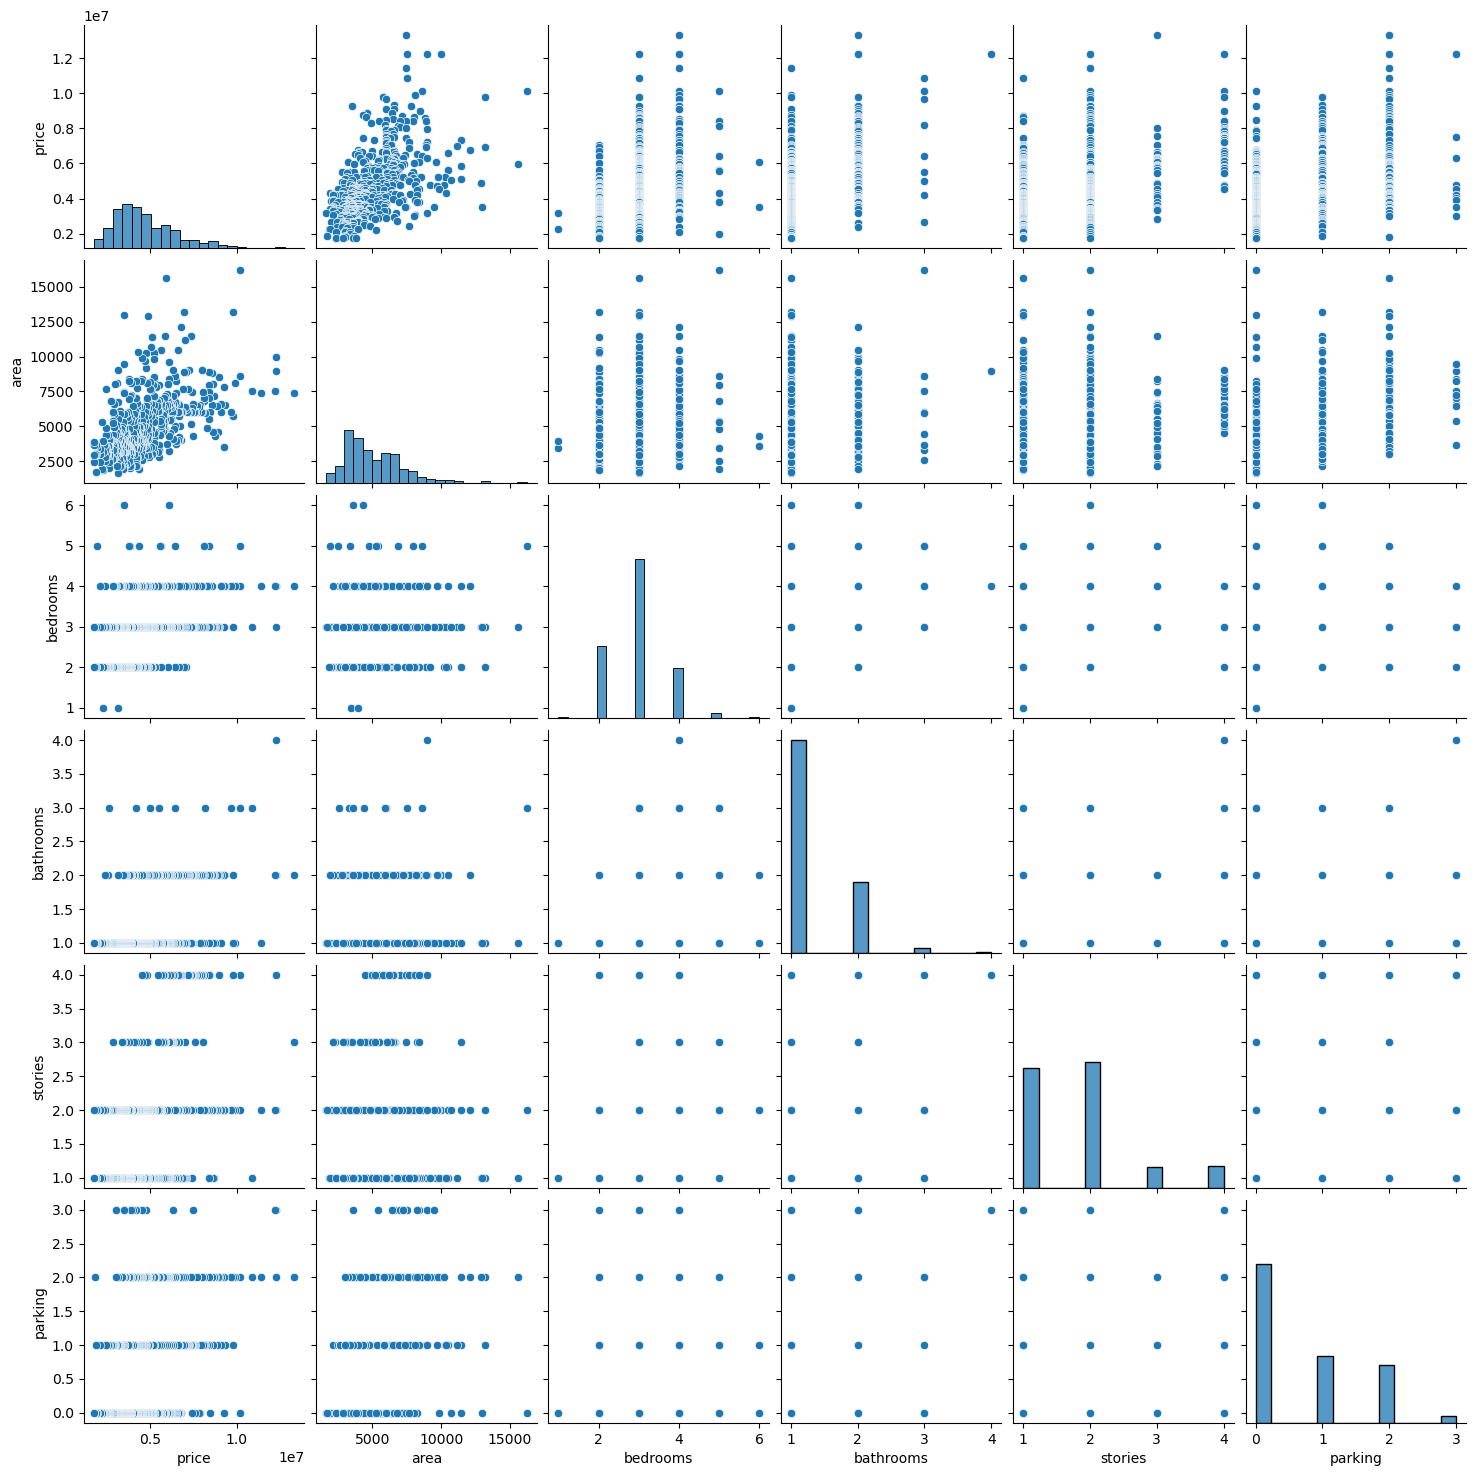

In [16]:
#Checking linear regression relationship
sns.pairplot(house)
# plt.savefig('Pairplots.png', dpi = 500)

# Part 3: Data preparation

### Binary mapping

In [17]:
def binary_map(x):
    
    return x.map({'yes': 1, 'no': 0})
    

In [18]:
status = cat_col.pop(-1)

In [19]:
house[cat_col] = house[cat_col].apply(lambda x: binary_map(x))

In [20]:
house[cat_col].head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,1,0,0,0,1,1
1,1,0,0,0,1,0
2,1,0,1,0,0,1
3,1,0,1,0,1,1
4,1,1,1,0,1,0


### Getting dummies

In [21]:
status = pd.get_dummies(house[status])

In [22]:
status.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


#### Concatanating status and house

In [23]:
house = pd.concat([house, status], axis = 1).drop(['furnishingstatus'], axis = 1)

In [24]:
house.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0


In [25]:
#saving the clean file
# house.to_csv('Housing_clean.csv', sep = ',', index = False)

In [26]:
corr = house.corr()

<Axes: >

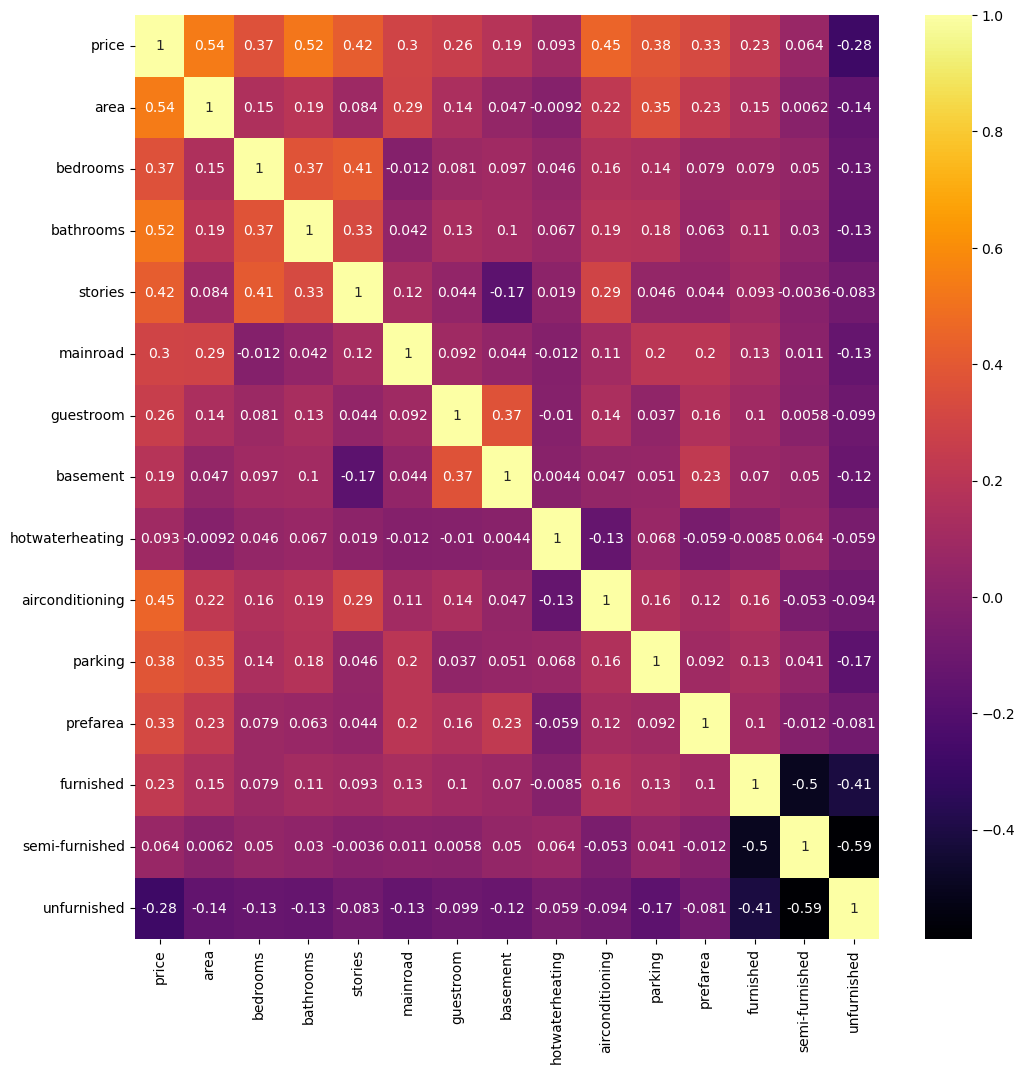

In [27]:
plt.figure(figsize = (12,12))
sns.heatmap(corr, annot = True, cmap = 'inferno')
# plt.savefig('Heatmap.png' , dpi = 500)

In [28]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

### Train test split

In [29]:
df_train, df_test = train_test_split(house, test_size = 0.3,
                                    random_state = 42)

In [30]:
df_train.shape

(381, 15)

In [31]:
df_test.shape

(164, 15)

### Rescalling numerical features

In [32]:
num_cols = num_cols + num_dis_col

In [33]:
scaler = MinMaxScaler()

In [34]:
df_train[num_cols] = scaler.fit_transform(df_train[num_cols])
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
126,0.393333,0.378694,0.4,0.0,0.0,1,0,1,0,0,0.666667,1,0,0,1
363,0.186667,0.132921,0.2,0.0,0.0,1,0,0,1,0,0.000000,0,0,1,0
370,0.180000,0.180756,0.2,0.0,0.0,1,0,0,0,1,0.666667,0,0,1,0
31,0.633333,0.367698,0.4,0.0,1.0,1,0,0,0,1,0.666667,0,0,1,0
113,0.412667,0.547766,0.4,0.0,0.0,1,0,1,0,0,0.666667,1,1,0,0


### Creating X and y

In [35]:
X_train, y_train = df_train.drop(['price'], axis = 1), df_train.price

# Part 4: Model training

In [36]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score, mean_squared_error

### MODEL 1

In [37]:
Model1 = sm.OLS(y_train, sm.add_constant(X_train))

In [38]:
Model1 = Model1.fit()

In [39]:
print(Model1.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.682    
Dependent Variable: price            AIC:                -696.5508
Date:               2023-05-21 23:34 BIC:                -641.3516
No. Observations:   381              Log-Likelihood:     362.28   
Df Model:           13               F-statistic:        63.79    
Df Residuals:       367              Prob (F-statistic): 1.00e-85 
R-squared:          0.693            Scale:              0.0090758
------------------------------------------------------------------
                    Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
------------------------------------------------------------------
const               0.0147   0.0148  0.9900 0.3228 -0.0145  0.0439
area                0.3510   0.0375  9.3512 0.0000  0.2772  0.4248
bedrooms            0.0385   0.0386  0.9977 0.3191 -0.0374  0.1144
bathrooms           0.3185   0.0353  9.0313 0.0000  0.2492  0.3879
stories      

### ANALYSIS OF MODEL 
    
    
    There is multicollinearity problem as can be seen from the summary.
    To address this we have to drop certain features.
    
    Also the coefficients like bedrooms, guestroom, semi-furnished, furnished and unfurnished
    have very high p-value. So thoes betas become statistically insignificant.

### PRINCIPLE OF USING ONE VARIABLE AT A TIME

#### Using varibales with highest correlations

In [40]:
var = list(corr.price.sort_values(ascending = False).index)

In [41]:
var.remove('price')

In [42]:
var_list = []
for i in range(1,len(var) + 1):
    k = var[ : i]
    var_list.append(k)
    

In [43]:
def get_linear_model(X_train, y_train):
    
    model = sm.OLS(y_train, sm.add_constant(X_train))
    model = model.fit()
    print(model.summary2())
    print('\n' * 4)
    
    return model
    

In [44]:
#getting the model after adding one variable at a time
models = []
adjusted_r2 = []
for i in var_list:
    m = get_linear_model(X_train = X_train[i],
                    y_train = y_train)
    models.append(m)
    adjusted_r2.append(round(m.rsquared_adj * 100, 3))

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.302    
Dependent Variable: price            AIC:                -408.4698
Date:               2023-05-21 23:34 BIC:                -400.5842
No. Observations:   381              Log-Likelihood:     206.23   
Df Model:           1                F-statistic:        165.6    
Df Residuals:       379              Prob (F-statistic): 1.10e-31 
R-squared:          0.304            Scale:              0.019936 
---------------------------------------------------------------------
          Coef.     Std.Err.       t       P>|t|     [0.025    0.975]
---------------------------------------------------------------------
const     0.1380      0.0136    10.1129    0.0000    0.1112    0.1648
area      0.6228      0.0484    12.8671    0.0000    0.5276    0.7180
------------------------------------------------------------------
Omnibus:              71.553       Durbin-Watson:          1.913 

#### Plot adjusted r2 for each model

Text(0.5, 1.0, 'Adjusted R2 vs No. of features')

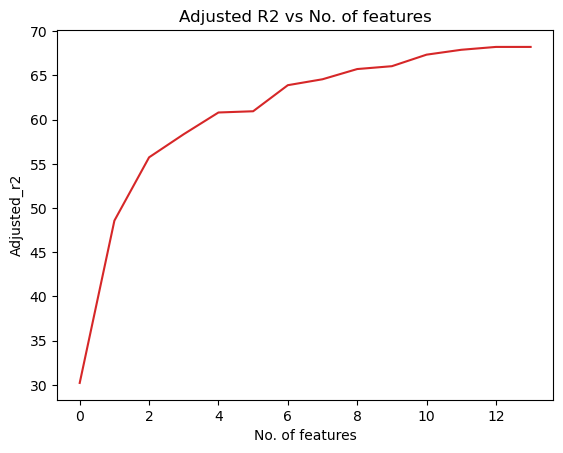

In [45]:
plt.plot(adjusted_r2, 'C3')
plt.ylabel('Adjusted_r2')
plt.xlabel('No. of features')
plt.title('Adjusted R2 vs No. of features')
# plt.savefig('Adjusted R2 vs no. of features.png', dpi = 500)

#### From the graph we can see that the adjusted r2 does not increase much after 10 variables. So we can drop some variables. The way we choose is looking at  `1. p-value` and  Multicollinearity by checking `2. VIF`

### Checking VIF

In [46]:
def get_VIF(X_train):
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [47]:
get_VIF(X_train)

,Features,VIF
12,semi-furnished,7.69
11,furnished,5.63
13,unfurnished,5.12
3,stories,1.57
6,basement,1.42
1,bedrooms,1.41
0,area,1.32
2,bathrooms,1.31
8,airconditioning,1.28
5,guestroom,1.27


#### Algorithm to feature selection/elimination-

1. Check VIF and p-value
2. Results-
    - high high
    - High, low,
        - High VIF, low p-value
        - Low VIF, high p-value
    - low, low
3. Eliminate highest p-value
4. Check for VIF
5. If two VIF are similar eliminate feature with higher p-value.
6. Repeat till VIF gets as low as 1 - 2 


### FEATURE ELIMINATION

In [48]:
def get_features(X_train, y_train, feat_):
    X_train = X_train.drop(feat_, axis = 1)
    model = get_linear_model(X_train, y_train)
    print(get_VIF(X_train))
    return model, X_train

In [49]:
# highest p-value and VIF is of semi-furnished
# remove semi-furnished
m1, X_train = get_features(X_train, y_train, feat_ = ['semi-furnished'])

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.682    
Dependent Variable: price            AIC:                -696.5508
Date:               2023-05-21 23:34 BIC:                -641.3516
No. Observations:   381              Log-Likelihood:     362.28   
Df Model:           13               F-statistic:        63.79    
Df Residuals:       367              Prob (F-statistic): 1.00e-85 
R-squared:          0.693            Scale:              0.0090758
------------------------------------------------------------------
                    Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
------------------------------------------------------------------
const               0.0243   0.0207  1.1732 0.2415 -0.0164  0.0650
area                0.3510   0.0375  9.3512 0.0000  0.2772  0.4248
bedrooms            0.0385   0.0386  0.9977 0.3191 -0.0374  0.1144
bathrooms           0.3185   0.0353  9.0313 0.0000  0.2492  0.3879
stories      

In [50]:
#removing bedrooms and semi furnished
m2, X_train = get_features(X_train, y_train,
                  feat_ = ['bedrooms'])

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.682    
Dependent Variable: price            AIC:                -697.5189
Date:               2023-05-21 23:34 BIC:                -646.2625
No. Observations:   381              Log-Likelihood:     361.76   
Df Model:           12               F-statistic:        69.02    
Df Residuals:       368              Prob (F-statistic): 1.93e-86 
R-squared:          0.692            Scale:              0.0090756
------------------------------------------------------------------
                    Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
------------------------------------------------------------------
const               0.0368   0.0164  2.2394 0.0257  0.0045  0.0692
area                0.3539   0.0374  9.4597 0.0000  0.2804  0.4275
bathrooms           0.3276   0.0341  9.6128 0.0000  0.2606  0.3946
stories             0.1264   0.0200  6.3033 0.0000  0.0869  0.1658
mainroad     

In [51]:
# removing gurnished, mainroad and guestroom as them have high values
m3, X_train = get_features(X_train, y_train,
             feat_ = ['furnished', 'guestroom', 'mainroad'])

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.676    
Dependent Variable: price            AIC:                -692.9940
Date:               2023-05-21 23:34 BIC:                -653.5660
No. Observations:   381              Log-Likelihood:     356.50   
Df Model:           9                F-statistic:        89.12    
Df Residuals:       371              Prob (F-statistic): 3.74e-87 
R-squared:          0.684            Scale:              0.0092544
------------------------------------------------------------------
                    Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
------------------------------------------------------------------
const               0.0640   0.0125  5.1236 0.0000  0.0395  0.0886
area                0.3847   0.0365 10.5462 0.0000  0.3129  0.4564
bathrooms           0.3182   0.0343  9.2858 0.0000  0.2508  0.3856
stories             0.1361   0.0200  6.8125 0.0000  0.0968  0.1754
basement     

In [52]:
# removing unfurnished
m4, X_train = get_features(X_train, y_train,
                           feat_ = ['hotwaterheating'] )

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.671    
Dependent Variable: price            AIC:                -688.5531
Date:               2023-05-21 23:34 BIC:                -653.0679
No. Observations:   381              Log-Likelihood:     353.28   
Df Model:           8                F-statistic:        98.07    
Df Residuals:       372              Prob (F-statistic): 8.19e-87 
R-squared:          0.678            Scale:              0.0093869
------------------------------------------------------------------
                    Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
------------------------------------------------------------------
const               0.0671   0.0125  5.3599 0.0000  0.0425  0.0918
area                0.3846   0.0367 10.4703 0.0000  0.3124  0.4568
bathrooms           0.3211   0.0345  9.3073 0.0000  0.2532  0.3889
stories             0.1393   0.0201  6.9384 0.0000  0.0998  0.1788
basement     

##### We can chhose the m3 model as it has `0.671` adjusted `r2` and all the features are statistically significant, at significance =  `0.015`. Also the VIF of each feature is less thn 5. `Area` has the highest ` VIF`

# Part 5: Model Evaluation

### RESIDUAL ANALYSIS

In [53]:
def residual_analysis(X_train, y_train, model):
    
    if input('Which model?\n(stats/sklearn) ').lower() == 'stats':
        
        y_train_pred = model.predict(sm.add_constant(X_train))
    
    else:
        
        y_train_pred = model.predict(X_train.values.reshape(-1, 1))

    
    res = y_train - y_train_pred
    
    for i in X_train.columns:
    
        plt.figure(figsize = (10, 5))    
        plt.subplot(1, 2, 1)
        sns.distplot(x = res, color = 'C3')
    
        plt.subplot(1, 2, 2)
        sns.scatterplot(x = X_train[i], y = res)
    
#         if input('Save residual analysis?\n(y/n) ').lower() == 'y':
#             plt.savefig(f'Residual analysis for {i}', dpi = 500)
    
#         else:
#             plt.show() 


Which model?
(stats/sklearn) stats


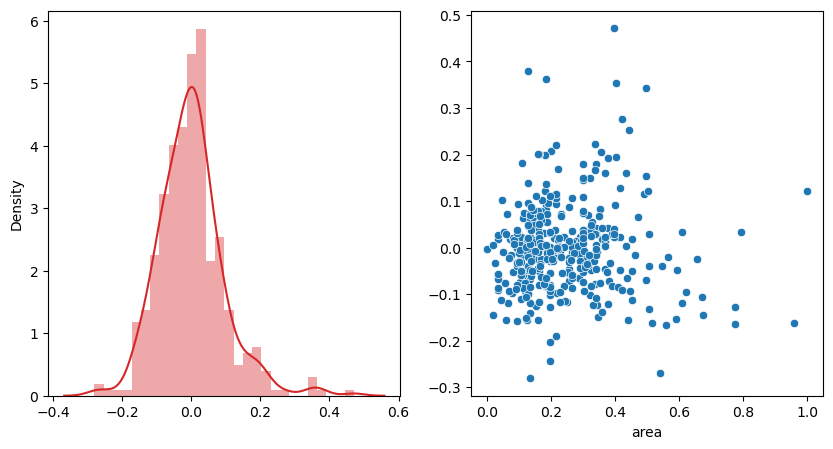

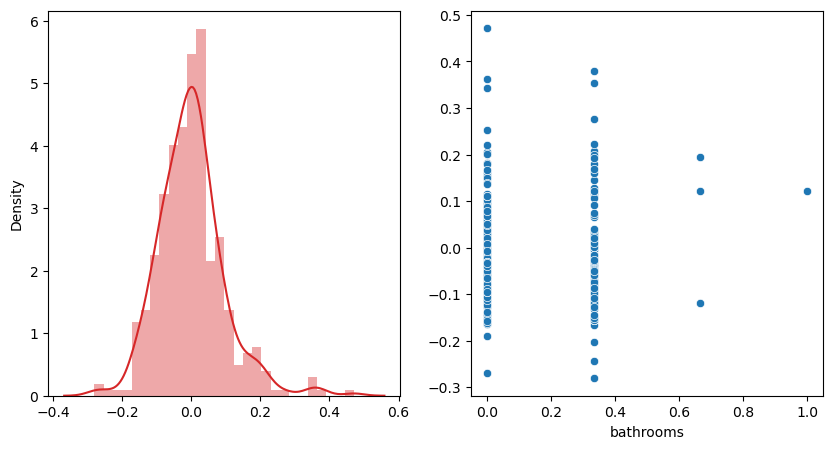

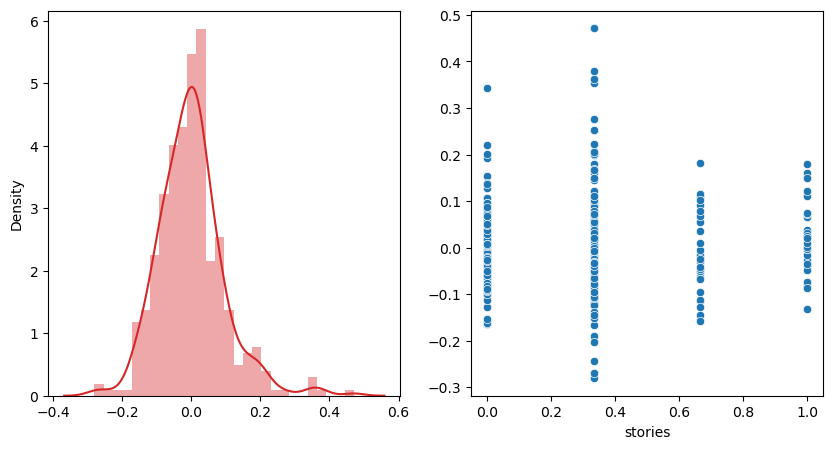

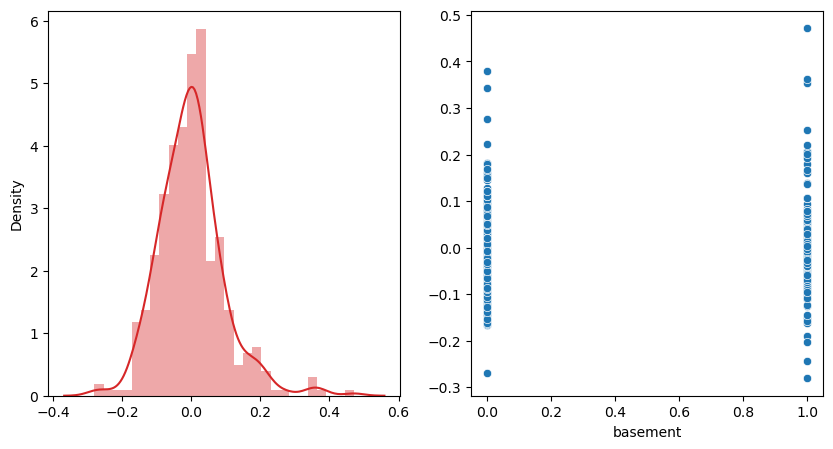

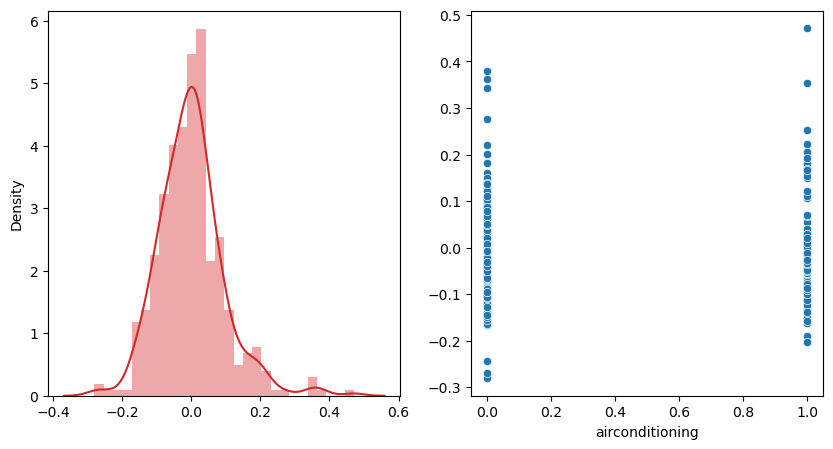

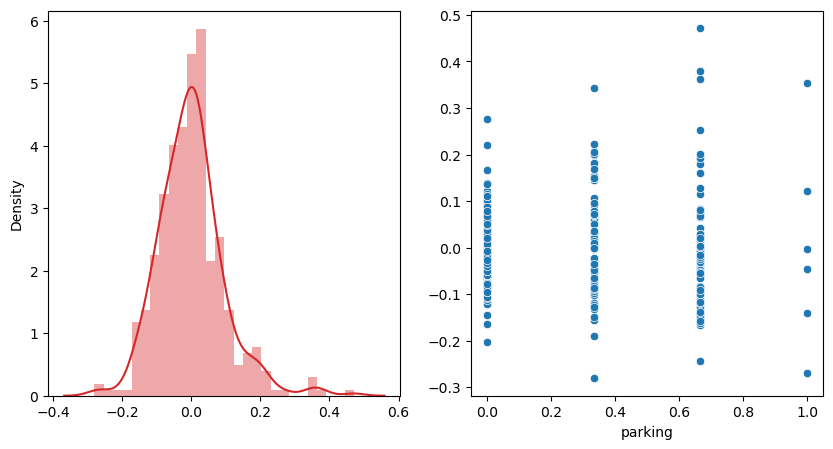

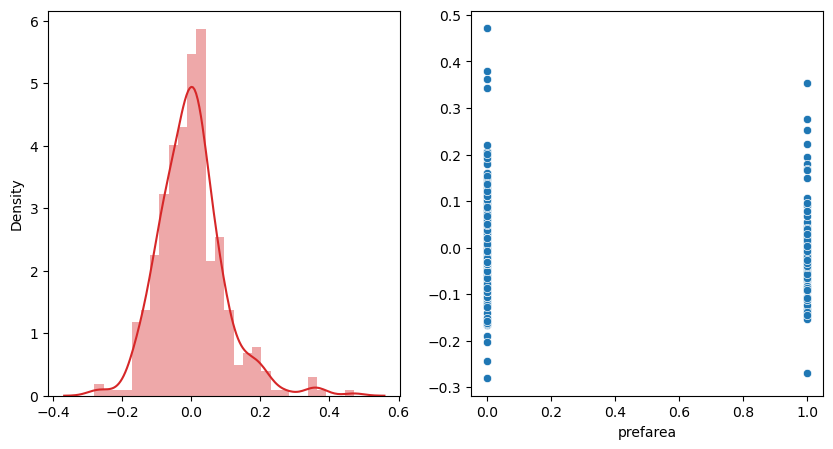

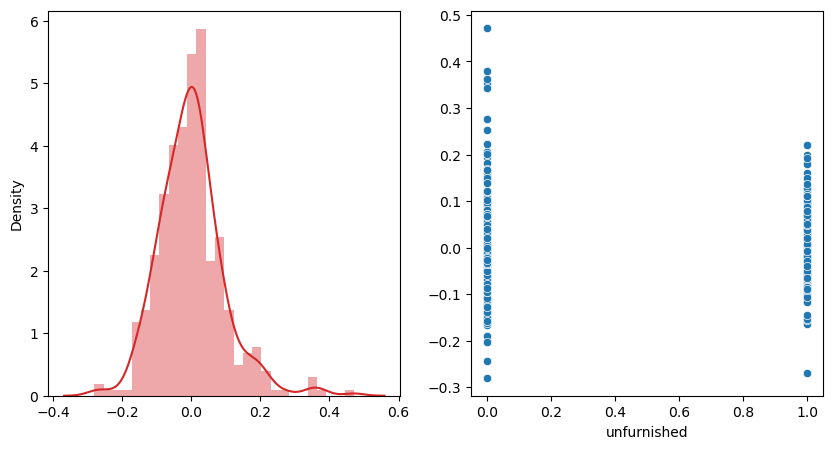

In [54]:
# training data
residual_analysis(X_train, y_train, m4)

##### For each of the features, `homscadasticity`of residuals with respect to the feature. Also the  residuals are `normally distributed`. 

### Thus our model seems to satisfy all assumptions of linear regression.
    1. Linear dependence of features with target
    2. No Multicollinearity 
    3. Residuals are normally distributed
    4. Residuals are homscadastic with respect to each feature
    

### PREDICTION OF TEST DATA 

#### Rescalling test dataframe

In [55]:
df_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
316,4060000,5900,4,2,2,0,0,1,0,0,1,0,0,0,1
77,6650000,6500,3,2,3,1,0,0,0,1,0,1,1,0,0
360,3710000,4040,2,1,1,1,0,0,0,0,0,0,0,1,0
90,6440000,5000,3,1,2,1,0,0,0,1,0,0,0,1,0
493,2800000,3960,3,1,1,1,0,0,0,0,0,0,1,0,0


In [56]:
df_test[num_cols] = scaler.transform(df_test[num_cols])
df_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
316,0.220000,0.292096,0.6,0.333333,0.333333,0,0,1,0,0,0.333333,0,0,0,1
77,0.466667,0.333333,0.4,0.333333,0.666667,1,0,0,0,1,0.000000,1,1,0,0
360,0.186667,0.164261,0.2,0.000000,0.000000,1,0,0,0,0,0.000000,0,0,1,0
90,0.446667,0.230241,0.4,0.000000,0.333333,1,0,0,0,1,0.000000,0,0,1,0
493,0.100000,0.158763,0.4,0.000000,0.000000,1,0,0,0,0,0.000000,0,1,0,0


#### Creating X and y

In [57]:
X_test = df_test[X_train.columns]
y_test = df_test.price

#### Prediction and evaluation

In [58]:
def model_eval(X_test, y_test, model):
    
    y_test_pred = model.predict(sm.add_constant(X_test))
        
    r2 = r2_score(y_true = y_test,
                  y_pred = y_test_pred)
    
    mse = mean_squared_error(y_true = y_test,
                             y_pred = y_test_pred )
    
    plt.scatter(x = y_test, y = y_test_pred, color = 'C1')
    plt.xlabel('y_test')
    plt.ylabel('y_test_pred')
    plt.title('y_test vs y_pred')
#   plt.savefig('y_test vs y_pred.png', dpi = 500)
    
    
    print('\nCoeff of determination, r2: {}'.format(r2))
    print('\nMean squared error, mse: {}'.format(mse))
    
    return r2, mse


Coeff of determination, r2: 0.6256981796491736

Mean squared error, mse: 0.014620318093337342


(0.6256981796491736, 0.014620318093337342)

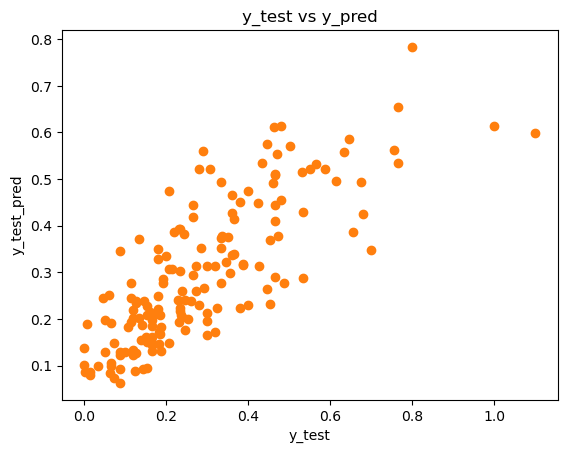

In [59]:
model_eval(X_test, y_test, m4)

### SAVING THE MODELS

models = [m1, m2, m3, m4]
for m in range(len(models)):
    fname = f'Model {m + 1}'
    pickle.dump(models[m], open(fname, 'wb'))